In [17]:
# Step 1: Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [18]:
# Step 2: Baca dataset
dataset = pd.read_csv('/content/CreditDataset.csv')

# Menampilkan beberapa baris data
print(dataset.head())

    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


In [19]:
# Step 3: Pisahkan fitur dan label
X = dataset.drop('Class', axis=1)  # Menghapus kolom target 'Class'
y = dataset['Class']  # Kolom target

In [20]:
# Step 4: Konversi nilai kategori menjadi numerik menggunakan One-Hot Encoding
X_encoded = pd.get_dummies(X)

In [21]:
# Step 5: Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [22]:
# Step 6: Standardisasi fitur (hanya diperlukan untuk k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Step 7: Model Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [24]:
# Step 8: Model k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)


Evaluasi untuk model Decision Tree:
Akurasi: 0.6766666666666666
Presisi: 0.78
Recall: 0.7464114832535885
F1-Score: 0.7628361858190709

Confusion Matrix:
[[156  53]
 [ 44  47]]

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.75      0.76       209
           2       0.47      0.52      0.49        91

    accuracy                           0.68       300
   macro avg       0.62      0.63      0.63       300
weighted avg       0.69      0.68      0.68       300



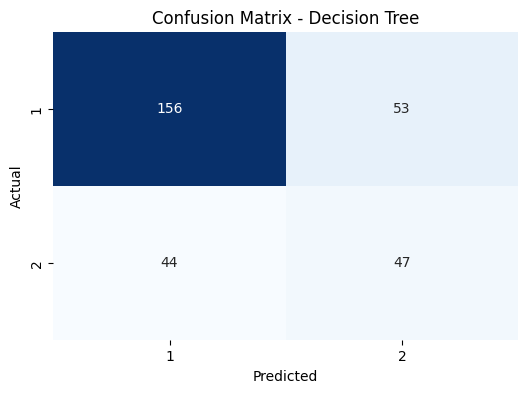

Evaluasi untuk model k-NN:
Akurasi: 0.7133333333333334
Presisi: 0.7573221757322176
Recall: 0.8660287081339713
F1-Score: 0.8080357142857143

Confusion Matrix:
[[181  28]
 [ 58  33]]

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.87      0.81       209
           2       0.54      0.36      0.43        91

    accuracy                           0.71       300
   macro avg       0.65      0.61      0.62       300
weighted avg       0.69      0.71      0.69       300



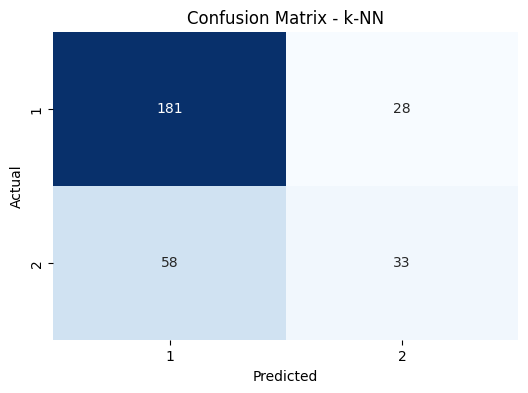

In [25]:
# Step 9: Evaluasi Model
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[1, 2], yticklabels=[1, 2])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluasi untuk Decision Tree
evaluate_model(y_test, y_pred_tree, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")

# Evaluasi untuk k-NN
evaluate_model(y_test, y_pred_knn, "k-NN")
plot_confusion_matrix(y_test, y_pred_knn, "k-NN")

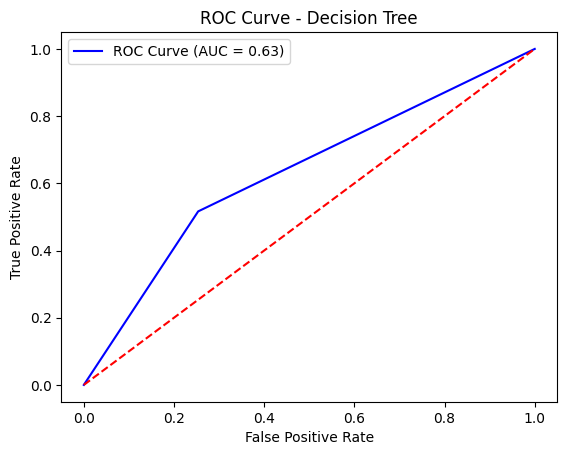

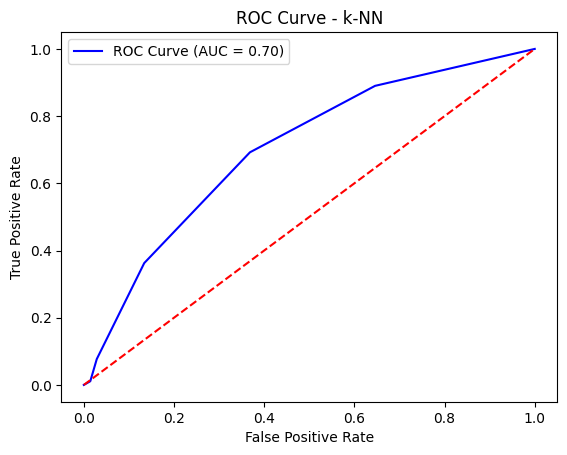

In [26]:
# Step 10: AUC dan ROC
def plot_roc_curve(y_test, y_pred_proba, model_name, pos_label):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=pos_label)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# ROC untuk Decision Tree
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_tree, "Decision Tree", pos_label=2)  # Tambahkan pos_label=2

# ROC untuk k-NN
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_pred_proba_knn, "k-NN", pos_label=2)  # Tambahkan pos_label=2